# 데이터 집계
### 수집한 데이터를 바탕으로 평균이나 합 등을 구하여 의미 있는 값을 도출해 내는 것을 '집계'라고 한다.

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('../data/gapminder.tsv', sep='\t')
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [57]:
avg_life_exp_by_yer = df.groupby('year').lifeExp.mean()
avg_life_exp_by_yer

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

## 분할-반열-결합 과정 - groupby 메서드 

In [58]:
years =df.year.unique()
print(years)

[1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 2002 2007]


In [59]:
years = df.year.unique()
print(years)
y1952 = df.loc[df.year == 1952, :]
print(y1952.head())
y1952_mean = y1952.lifeExp.mean()
print(y1952_maen)
y1957 = df.loc[df.year == 1957, :]
y1957_mean = y1957.lifeExp.mean()
print(y1957_maen)
y1962 = df.loc[df.year == 1962, :]
y1962_mean = y1962.lifeExp.mean()
print(y1962_maen)
y2007 = df.loc[df.year == 2007, :]
y2007_mean = y2007.lifeExp.mean()
print(y2007_maen)

[1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 2002 2007]
        country continent  year  lifeExp       pop    gdpPercap
0   Afghanistan      Asia  1952   28.801   8425333   779.445314
12      Albania    Europe  1952   55.230   1282697  1601.056136
24      Algeria    Africa  1952   43.077   9279525  2449.008185
36       Angola    Africa  1952   30.015   4232095  3520.610273
48    Argentina  Americas  1952   62.485  17876956  5911.315053
49.05761971830987
51.50740112676054
53.60924901408449
67.00742253521126


In [60]:
df2 = pd.DataFrame({"year":[1952, 1957, 1962, 2007],
                    "":[y1952_mean, y1957_mean, y1962_mean, y2007_mean ]})
print(df2)

   year           
0  1952  49.057620
1  1957  51.507401
2  1962  53.609249
3  2007  67.007423


# groupby 메서드와 함꼐 사용하는 집계 메서드

In [61]:
groupmethod = pd.DataFrame({
    'method' : ['count', 'size', 'mean', 'std', 'min', 'quantile(q=0.25)', 'quantile(q=0.50)', 'quantile(q=0.75)', 'max', 'sum', 'var', 'sem', 'describe', 'first', 'last', 'nth'],
    'content': ['누락값을 제외한 데이터를 수를 반환', '누락값을 포함한 데이터 수를 반환', '평균값 반환', '표준편차 반환', '최솟값 반환', '백분위 25%',
               '백분위 50%', '백분위수 75%', '최댓값 반환', '전체 합 반환', '분산 반환', '평균의 표준편차 반환', '데이터 수, 평균, 표준편차, 최솟값, 백분위수, 최댓값을 모두 반환',
               '첫 번쨰 행 반환', '마지막 행 반환', 'N번째 행 반환']
})
groupmethod

,method,content
0,count,누락값을 제외한 데이터를 수를 반환
1,size,누락값을 포함한 데이터 수를 반환
2,mean,평균값 반환
3,std,표준편차 반환
4,min,최솟값 반환
5,quantile(q=0.25),백분위 25%
6,quantile(q=0.50),백분위 50%
7,quantile(q=0.75),백분위수 75%
8,max,최댓값 반환
9,sum,전체 합 반환


## agg 메서드로 사용자 함수와 groupby 메서드 조합하기
### 라이브러리에서 제공하는 집게 메서드로 원하는 값을 계산할 수 없는 경우에는 직접 함수를 만들어서 사용해야 한다.
### 사용자 함수와 groupby 매서드를 조합하려면 agg 메서드를 이용해야 한다.

In [62]:
def my_mean(values):
    n = len(values)
    sum = 0
    for value in values:
        sum += value
    return sum/n

In [63]:
agg_my_mean = df.groupby('year').lifeExp.agg(my_mean)
print(agg_my_mean)

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


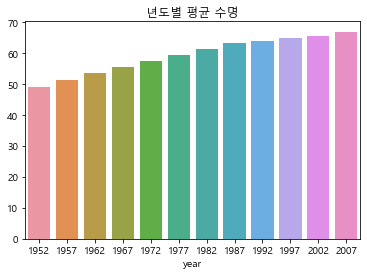

In [98]:
ax = plt.subplot()
ax = sns.barplot(agg_my_mean.index, agg_my_mean.values)
ax.set_title("년도별 평균 수명")
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] =False


## 2개의 인자값을 받아 처리하는 사용자 함수와 groupby 메서드

In [64]:
def my_mean_diff(values, diff_value):
    n = len(values)
    sum = 0
    for value in values:
        sum += value
    mean = sum /n
    return mean - diff_value

## 연도별 평균 수명에서 전체 평균 수명을 뺀 값

In [99]:
global_mean = df.lifeExp.mean()
print(global_mean) # 59.47443936619713

agg_mean = df.groupby('year').lifeExp.agg(my_mean_diff,diff_value =global_mean)
print(agg_mean)
print(agg_mean.index)
print(agg_mean.values)

59.47443936619713
year
1952   -10.416820
1957    -7.967038
1962    -5.865190
1967    -3.796150
1972    -1.827053
1977     0.095718
1982     2.058758
1987     3.738173
1992     4.685899
1997     5.540237
2002     6.220483
2007     7.532983
Name: lifeExp, dtype: float64
Int64Index([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
            2007],
           dtype='int64', name='year')
[-10.41681965  -7.96703824  -5.86519035  -3.79614979  -1.82705289
   0.0957181    2.05875782   3.73817331   4.68589866   5.54023669
   6.22048317   7.53298317]


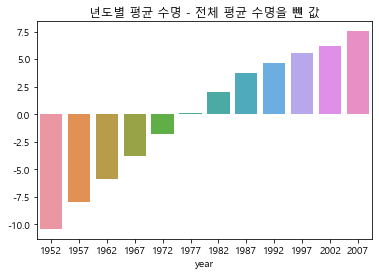

In [100]:
ax = plt.subplots()
ax = sns.barplot(agg_mean.index,agg_mean.values )
ax.set_title("년도별 평균 수명 - 전체 평균 수명을 뺸 값")
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] =False

## 여러 개의 집계 메서드 한 번에 사용하기

In [106]:
import numpy as np
gdf = df.groupby('year').lifeExp.agg([np.count_nonzero, np.mean, np.std])
print(gdf)
print(type(gdf))

      count_nonzero       mean        std
year                                     
1952          142.0  49.057620  12.225956
1957          142.0  51.507401  12.231286
1962          142.0  53.609249  12.097245
1967          142.0  55.678290  11.718858
1972          142.0  57.647386  11.381953
1977          142.0  59.570157  11.227229
1982          142.0  61.533197  10.770618
1987          142.0  63.212613  10.556285
1992          142.0  64.160338  11.227380
1997          142.0  65.014676  11.559439
2002          142.0  65.694923  12.279823
2007          142.0  67.007423  12.073021
<class 'pandas.core.frame.DataFrame'>
year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: mean, dtype: float64


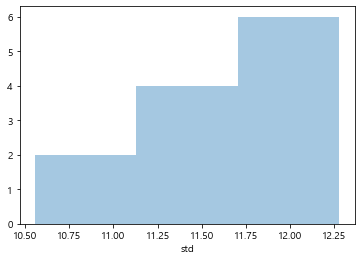

In [111]:
scatter = sns.distplot(gdf['std'], kde=False)

## 딕션너리를 이용해서 agg 매소드로 필요한 집계 함수 호출하기

In [113]:
gdf_dict = df.groupby('year').agg({'lifeExp': ['mean','median'], 'pop': 'median', 'gdpPercap': 'median'})
gdf_dict

lifeExp                  pop    gdpPercap
           mean   median      median       median
year                                             
1952  49.057620  45.1355   3943953.0  1968.528344
1957  51.507401  48.3605   4282942.0  2173.220291
1962  53.609249  50.8810   4686039.5  2335.439533
1967  55.678290  53.8250   5170175.5  2678.334741
1972  57.647386  56.5300   5877996.5  3339.129407
1977  59.570157  59.6720   6404036.5  3798.609244
1982  61.533197  62.4415   7007320.0  4216.228428
1987  63.212613  65.8340   7774861.5  4280.300366
1992  64.160338  67.7030   8688686.5  4386.085502
1997  65.014676  69.3940   9735063.5  4781.825478
2002  65.694923  70.8255  10372918.5  5319.804524
2007  67.007423  71.9355  10517531.0  6124.371109

# 데이터 변환

## 데이터 변환 메서드는 데이터와 메서드를 일대일로 대응시켜 계산하기 떄문에 데이터의 양이 줄어들지 않는다. 단지 변환하는데 사용!

# 표준점수 계산하기

### 데이터의 평균과 표준편차의 차이를 표준점수라 부른다.
### 표준점수를 구하면 변환한 데이터의 평균값이 0이되고 표준편차는 1이 된다.
### 그러면 데이터가 표준화되서 서로다른 데이터를 쉽게 비교 가능하게됨

## 표준점수를 계산하는 함수

In [114]:
def my_zscore(x):
    return (x - x.mean())/ x.std()

In [116]:
transform_z =df.groupby('year').lifeExp.transform(my_zscore)
transform_z.head()

0   -1.656854
1   -1.731249
2   -1.786543
3   -1.848157
4   -1.894173
Name: lifeExp, dtype: float64

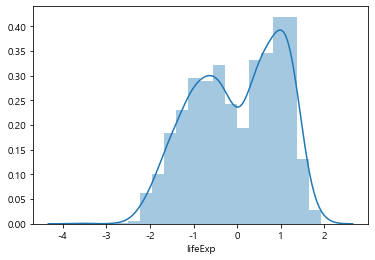

In [117]:
ax = plt.subplot()
ax = sns.distplot(transform_z)

In [119]:
print(df.shape)
print(transform_z.shape)

(1704, 6)
(1704,)


## 누락값을 평균값으로 처리하기

In [125]:
import seaborn as sns

np.random.seed(42)
tips_10 = sns.load_dataset('tips').sample(10)
tips_10.loc[np.random.permutation(tips_10.index)[:4], 'total_bill'] = np.NaN
tips_10

,total_bill,tip,sex,smoker,day,time,size
24,19.82,3.18,Male,No,Sat,Dinner,2
6,8.77,2.00,Male,No,Sun,Dinner,2
153,NaN,2.00,Male,No,Sun,Dinner,4
211,NaN,5.16,Male,Yes,Sat,Dinner,4
198,NaN,2.00,Female,Yes,Thur,Lunch,2
176,NaN,2.00,Male,Yes,Sun,Dinner,2
192,28.44,2.56,Male,Yes,Thur,Lunch,2
124,12.48,2.52,Female,No,Thur,Lunch,2
9,14.78,3.23,Male,No,Sun,Dinner,2
101,15.38,3.00,Female,Yes,Fri,Dinner,2


In [127]:
count_sex = tips_10.groupby('sex').count()
count_sex

,total_bill,tip,smoker,day,time,size
sex,,,,,,
Male,4,7,7,7,7,7
Female,2,3,3,3,3,3


In [128]:
def fill_na_mean(x):
    avg = x.mean()
    return x.fillna(avg)

## total_bill 의 누락값을 fill_na_mean으로 채워서 평균값으로 채움 

In [131]:
total_bill_group_mean = tips_10.groupby('sex').total_bill.transform(fill_na_mean)
tips_10['fill_total_bill'] = total_bill_group_mean
print(tips_10)

     total_bill   tip     sex smoker   day    time  size  fill_total_bill
24        19.82  3.18    Male     No   Sat  Dinner     2          19.8200
6          8.77  2.00    Male     No   Sun  Dinner     2           8.7700
153         NaN  2.00    Male     No   Sun  Dinner     4          17.9525
211         NaN  5.16    Male    Yes   Sat  Dinner     4          17.9525
198         NaN  2.00  Female    Yes  Thur   Lunch     2          13.9300
176         NaN  2.00    Male    Yes   Sun  Dinner     2          17.9525
192       28.44  2.56    Male    Yes  Thur   Lunch     2          28.4400
124       12.48  2.52  Female     No  Thur   Lunch     2          12.4800
9         14.78  3.23    Male     No   Sun  Dinner     2          14.7800
101       15.38  3.00  Female    Yes   Fri  Dinner     2          15.3800


# 데이터 필터링 
### 

In [137]:
tips = sns.load_dataset('tips')
print(tips)
print(tips.shape)

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
(244, 7)


In [136]:
print(tips['size'].value_counts())

2    156
3     38
4     37
5      5
6      4
1      4
Name: size, dtype: int64


In [143]:
tips_filtered = tips.\
        groupby('size').\
        filter(lambda x: x['size'].count() >= 30)
print(tips_filtered)
print(tips_filtered.shape)
print(tips_filtered['size'].value_counts())

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[231 rows x 7 columns]
(231, 7)
2    156
3     38
4     37
Name: size, dtype: int64


# 그룹 오브젝트 살펴보기
### 지금까지는 groupby 메서드에 바로 집계 메서드를 사용해여 결과를 확인함, 즉 groupby 메서드가 반환하는 값인 그룹 오브젝트에 대해서는 언급x. 이번엔 groupby 메서드의 결괏값인 그룹 오브젝트에 대하여 살펴보자!

In [144]:
tips_10 = sns.load_dataset('tips').sample(10, random_state=42)
print(tips_10)

     total_bill   tip     sex smoker   day    time  size
24        19.82  3.18    Male     No   Sat  Dinner     2
6          8.77  2.00    Male     No   Sun  Dinner     2
153       24.55  2.00    Male     No   Sun  Dinner     4
211       25.89  5.16    Male    Yes   Sat  Dinner     4
198       13.00  2.00  Female    Yes  Thur   Lunch     2
176       17.89  2.00    Male    Yes   Sun  Dinner     2
192       28.44  2.56    Male    Yes  Thur   Lunch     2
124       12.48  2.52  Female     No  Thur   Lunch     2
9         14.78  3.23    Male     No   Sun  Dinner     2
101       15.38  3.00  Female    Yes   Fri  Dinner     2


In [145]:
grouped = tips_10.groupby('sex')
print(grouped)

In [146]:
print(grouped.groups)

{'Male': Int64Index([24, 6, 153, 211, 176, 192, 9], dtype='int64'), 'Female': Int64Index([198, 124, 101], dtype='int64')}


## 한번에 그룹 오브젝트 계산하기

### 그룹오브젝트 평균구하기

#### tips 데이터 집합의 열을 확인 해보면 평균값을 계산할 수 없는 열이 smoker, day, time 열은 그룹연산에서 제외됨! 이처럼 파이썬은 그룹 연산에 적합한 열을 알아서 골라줌!

In [151]:
print(type(avgs))
print(tips_10.columns)


<class 'pandas.core.frame.DataFrame'>
Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')


In [152]:
avgs = grouped.mean()
avgs

,total_bill,tip,size
sex,,,
Male,20.02,2.875714,2.571429
Female,13.62,2.506667,2.000000


In [154]:
female = grouped.get_group('Female')
female

,total_bill,tip,sex,smoker,day,time,size
198,13.00,2.00,Female,Yes,Thur,Lunch,2
124,12.48,2.52,Female,No,Thur,Lunch,2
101,15.38,3.00,Female,Yes,Fri,Dinner,2


In [155]:
for sex_group in grouped:
    print(sex_group)

('Male',      total_bill   tip   sex smoker   day    time  size
24        19.82  3.18  Male     No   Sat  Dinner     2
6          8.77  2.00  Male     No   Sun  Dinner     2
153       24.55  2.00  Male     No   Sun  Dinner     4
211       25.89  5.16  Male    Yes   Sat  Dinner     4
176       17.89  2.00  Male    Yes   Sun  Dinner     2
192       28.44  2.56  Male    Yes  Thur   Lunch     2
9         14.78  3.23  Male     No   Sun  Dinner     2)
('Female',      total_bill   tip     sex smoker   day    time  size
198       13.00  2.00  Female    Yes  Thur   Lunch     2
124       12.48  2.52  Female     No  Thur   Lunch     2
101       15.38  3.00  Female    Yes   Fri  Dinner     2)


In [160]:
for sex_group in grouped:
    print('the type is :{}\n'.format(type(sex_group)))
    print("the length is :{}\n".format(len(sex_group)))

    first_element = sex_group[0]
    print('first_element is :{}\n'.format(first_element))
    print('it has a type of: {}\n'.format(type(sex_group[0])))
    
    second_element = sex_group[1]
    print('second_element_element is :{}\n'.format(second_element))
    print('it has a type of: {}\n'.format(type(second_element)))
    
    print('what we have:')
    print(sex_group)
    break

the type is :<class 'tuple'>

the length is :2

first_element is :Male

it has a type of: <class 'str'>

second_element_element is :     total_bill   tip   sex smoker   day    time  size
24        19.82  3.18  Male     No   Sat  Dinner     2
6          8.77  2.00  Male     No   Sun  Dinner     2
153       24.55  2.00  Male     No   Sun  Dinner     4
211       25.89  5.16  Male    Yes   Sat  Dinner     4
176       17.89  2.00  Male    Yes   Sun  Dinner     2
192       28.44  2.56  Male    Yes  Thur   Lunch     2
9         14.78  3.23  Male     No   Sun  Dinner     2

it has a type of: <class 'pandas.core.frame.DataFrame'>

what we have:
('Male',      total_bill   tip   sex smoker   day    time  size
24        19.82  3.18  Male     No   Sat  Dinner     2
6          8.77  2.00  Male     No   Sun  Dinner     2
153       24.55  2.00  Male     No   Sun  Dinner     4
211       25.89  5.16  Male    Yes   Sat  Dinner     4
176       17.89  2.00  Male    Yes   Sun  Dinner     2
192       28.44  

## 여러 열을 사용해 그룹 오브젝트 만들고 계산하기
여러 열을 사용하여 데이터를 그룹화 하려면 리스트에 열 이름을 담아 groupby 메서드에 전달하면됨

In [163]:
bill_sex_time = tips_10.groupby(['sex', 'time'])
group_avg = bill_sex_time.mean()
print(group_avg)
print(type(group_avg))
print(group_avg.columns)

               total_bill       tip      size
sex    time                                  
Male   Lunch    28.440000  2.560000  2.000000
       Dinner   18.616667  2.928333  2.666667
Female Lunch    12.740000  2.260000  2.000000
       Dinner   15.380000  3.000000  2.000000
<class 'pandas.core.frame.DataFrame'>
Index(['total_bill', 'tip', 'size'], dtype='object')


In [164]:
print(group_avg.index)

MultiIndex([(  'Male',  'Lunch'),
            (  'Male', 'Dinner'),
            ('Female',  'Lunch'),
            ('Female', 'Dinner')],
           names=['sex', 'time'])


## 위의 과정과 같이 데이터프레임의 인덱스가 MultiIndex인 경우에는 reset_index 메서드를 사용하여 데이터프레임의 인덱스를 새로 부여 할수 있다.

      sex    time  total_bill       tip      size
0    Male   Lunch   28.440000  2.560000  2.000000
1    Male  Dinner   18.616667  2.928333  2.666667
2  Female   Lunch   12.740000  2.260000  2.000000
3  Female  Dinner   15.380000  3.000000  2.000000


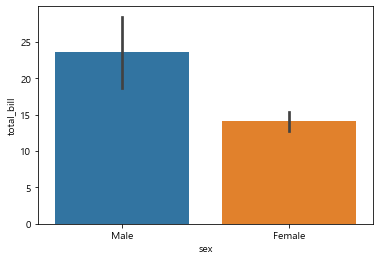

In [173]:
group_method = tips_10.groupby(['sex', 'time']).mean().reset_index()
print(group_method)
ax = plt.subplot()
ax = sns.barplot(group_method['sex'], group_method['total_bill'])

In [168]:
group_param =tips_10.groupby(['sex', 'time'] , as_index=False).mean()
print(group_param)

      sex    time  total_bill       tip      size
0    Male   Lunch   28.440000  2.560000  2.000000
1    Male  Dinner   18.616667  2.928333  2.666667
2  Female   Lunch   12.740000  2.260000  2.000000
3  Female  Dinner   15.380000  3.000000  2.000000


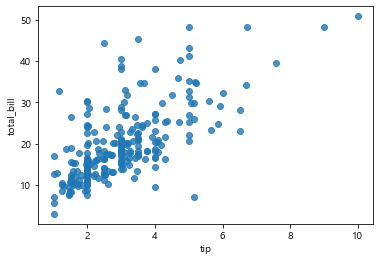

In [177]:
ax = plt.subplot()
ax = sns.regplot(x='tip', y ='total_bill', data=tips, fit_reg=False)